In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv("Advertising.csv")

In [42]:
df = pd.DataFrame(df)

# Exploratory Data Analysis

In [43]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [45]:
df = df.drop(['Unnamed: 0'],axis=1) 


In [46]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [47]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Data Visualization

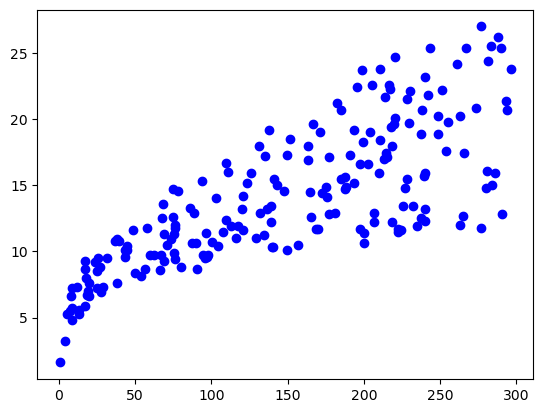

In [48]:
plt.scatter(df['TV'],df['Sales'],color='b')

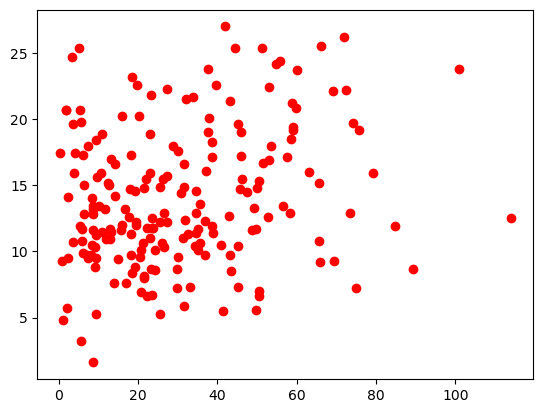

In [49]:
plt.scatter(df['Newspaper'],df['Sales'],color='r')

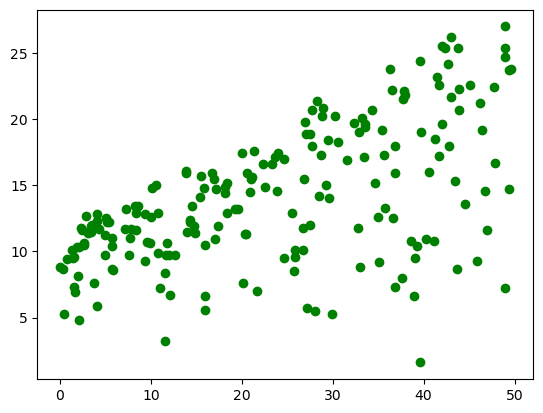

In [50]:
plt.scatter(df['Radio'],df['Sales'],color='g')

(array([ 1.,  1.,  0.,  1.,  5.,  3.,  7.,  4.,  9., 14., 17., 16., 17.,
        14.,  4., 12., 12.,  5., 10.,  6.,  6.,  8.,  4.,  5.,  6.,  1.,
         5.,  1.,  4.,  2.]),
 array([ 1.6       ,  2.44666667,  3.29333333,  4.14      ,  4.98666667,
         5.83333333,  6.68      ,  7.52666667,  8.37333333,  9.22      ,
        10.06666667, 10.91333333, 11.76      , 12.60666667, 13.45333333,
        14.3       , 15.14666667, 15.99333333, 16.84      , 17.68666667,
        18.53333333, 19.38      , 20.22666667, 21.07333333, 21.92      ,
        22.76666667, 23.61333333, 24.46      , 25.30666667, 26.15333333,
        27.        ]),
 <BarContainer object of 30 artists>)

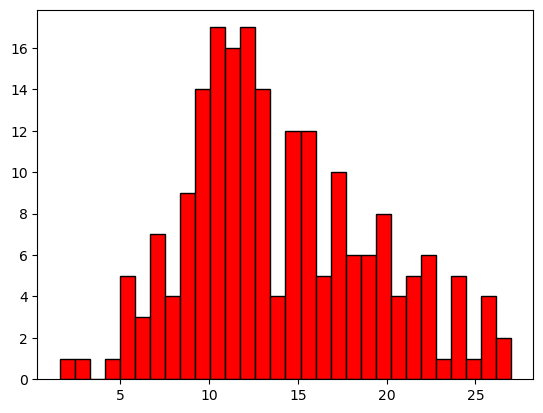

In [51]:
plt.hist(df['Sales'], color ='red', bins = 30,edgecolor='Black')


<Axes: >

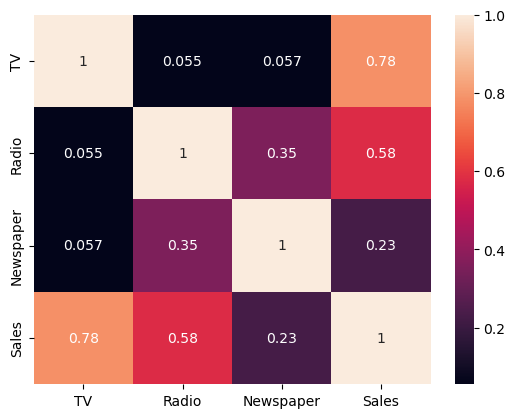

In [52]:
sns.heatmap(df.corr(),annot=True)

# Modeling

In [53]:
y = df['Sales']
x = df.drop(['Sales'],axis=1)
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Using Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
reg = LinearRegression()

In [57]:
reg.fit(x_train,y_train)

LinearRegression()

In [58]:
y_pred1 =reg.predict(x_test)

In [59]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred1)

0.899438024100912

In [60]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse_linear = mean_squared_error(y_test, y_pred1)
rmse_linear = sqrt(mse_linear)
print(f'Linear Regression RMSE: {rmse_linear:f}')

Linear Regression RMSE: 1.781600


# Using Support Vector Regression

In [61]:
from sklearn.svm import SVR
reg2 = SVR()
reg2.fit(x_train, y_train)
y_pred2 = reg2.predict(x_test)

In [62]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred2)

0.873080187377834

In [63]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse_linear = mean_squared_error(y_test, y_pred2)
rmse_linear = sqrt(mse_linear)
print(f'Support Vector Regression RMSE: {rmse_linear:f}')

Support Vector Regression RMSE: 2.001511


# Using Decision Tree Regression

In [64]:
from sklearn.tree import DecisionTreeRegressor

In [65]:
reg3 = DecisionTreeRegressor()
reg3.fit(x_train, y_train)
y_pred3 = reg3.predict(x_test)

In [66]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred3)

0.9468137242768815

In [67]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse_linear = mean_squared_error(y_test, y_pred3)
rmse_linear = sqrt(mse_linear)
print(f'Decision Tree Regression RMSE: {rmse_linear:f}')

Decision Tree Regression RMSE: 1.295666


# Using Random Forest Regression

In [68]:
from sklearn.ensemble import RandomForestRegressor
reg4 = RandomForestRegressor()
reg4.fit(x_train, y_train)
y_pred4 = reg4.predict(x_test)

In [69]:
from sklearn.metrics import r2_score
r2_score( y_pred4, y_test)

0.9815168867001527

In [70]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse_linear = mean_squared_error(y_test, y_pred4)
rmse_linear = sqrt(mse_linear)
print(f'Random Forest Regression RMSE: {rmse_linear:f}')

Random Forest Regression RMSE: 0.741483


# From all above regressions, Random Forest is the best 

# output

In [76]:
x = input('Enter TV advertising amount ')
y = input('Enter RADIO advertising amount ')
z = input('Enter NEWSPAPER advertising amount ')
value[0] = reg4.predict([[x, y, z]])
print("{:.1f}".format(value[0]))

Enter TV advertising amount 23.5
Enter RADIO advertising amount 69
Enter NEWSPAPER advertising amount 654
9.3
